In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Dropout,Flatten,MaxPooling2D,AveragePooling2D
from keras.utils import to_categorical
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import numpy as np

Using TensorFlow backend.


In [2]:
(train_imgs, train_labels), (test_imgs, test_labels) = mnist.load_data()

In [3]:
train_imgs=train_imgs.reshape(train_imgs.shape[0],train_imgs.shape[1],train_imgs.shape[2],1)
train_imgs=train_imgs.astype('float32')/255

test_imgs=test_imgs.reshape(test_imgs.shape[0],test_imgs.shape[1],test_imgs.shape[2],1)
test_imgs=test_imgs.astype('float32')/255

In [4]:
train_labels=to_categorical(train_labels,10)
test_labels=to_categorical(test_labels,10)

In [5]:
training_imgs,val_imgs,training_labels,val_labels=train_test_split(train_imgs,train_labels,test_size=0.1,
                                                                  random_state=42)

In [6]:
def conv_net():
    model=Sequential()
    model.add(Conv2D(16,kernel_size=(3,3),activation='relu'))
    model.add(MaxPooling2D(2,2))
    model.add(Conv2D(16,kernel_size=(3,3),activation='relu'))
    model.add(MaxPooling2D(2,2)) 
    model.add(Flatten())
    model.add(Dense(10,activation='softmax'))
    
    model.compile(optimizer='adam',loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [7]:
model=conv_net()
history=model.fit(training_imgs,training_labels,validation_data=(val_imgs,val_labels),batch_size=128,epochs=15)

Train on 54000 samples, validate on 6000 samples
Epoch 1/15
54000/54000 [==============================] - 11s 204us/step - loss: 0.4801 - accuracy: 0.8636 - val_loss: 0.1700 - val_accuracy: 0.9532
Epoch 2/15
54000/54000 [==============================] - 11s 197us/step - loss: 0.1353 - accuracy: 0.9594 - val_loss: 0.1069 - val_accuracy: 0.9678
Epoch 3/15
54000/54000 [==============================] - 11s 198us/step - loss: 0.0967 - accuracy: 0.9706 - val_loss: 0.0822 - val_accuracy: 0.9778
Epoch 4/15
54000/54000 [==============================] - 11s 204us/step - loss: 0.0790 - accuracy: 0.9757 - val_loss: 0.0760 - val_accuracy: 0.9778
Epoch 5/15
54000/54000 [==============================] - 11s 205us/step - loss: 0.0696 - accuracy: 0.9793 - val_loss: 0.0689 - val_accuracy: 0.9803
Epoch 6/15
54000/54000 [==============================] - 14s 257us/step - loss: 0.0625 - accuracy: 0.9803 - val_loss: 0.0711 - val_accuracy: 0.9773
Epoch 7/15
54000/54000 [==============================] -

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 16)        2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                4010      
Total params: 6,490
Trainable params: 6,490
Non-trainable params: 0
____________________________________________________

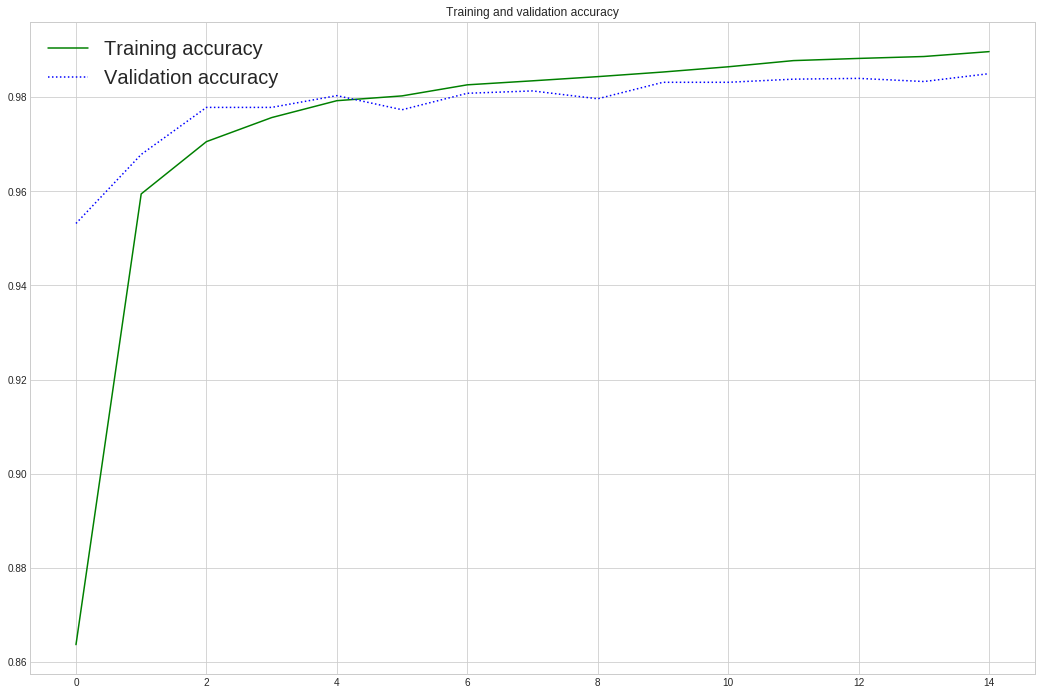

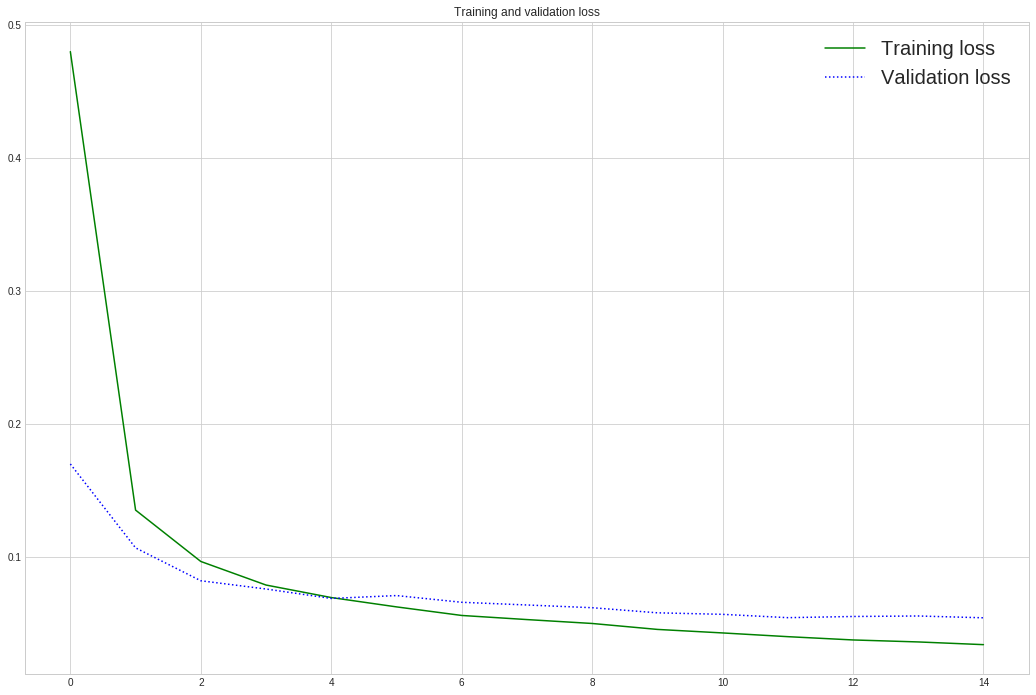

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline


epoch = history.epoch

plt.style.use('seaborn-whitegrid')
loss = history.history['accuracy']
val_loss = history.history['val_accuracy']
 
plt.figure(figsize=(18,12))
plt.plot(epoch, loss, 'g', label='Training accuracy')
plt.plot(epoch, val_loss, 'b:', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=2, prop={'size': 20})
plt.show()

plt.style.use('seaborn-whitegrid')
loss = history.history['loss']
val_loss = history.history['val_loss']
 
plt.figure(figsize=(18,12))
plt.plot(epoch, loss, 'g', label='Training loss')
plt.plot(epoch, val_loss, 'b:', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=1, prop={'size': 20})
plt.show()

In [10]:
y_train_true=[]

for i in range(len(training_labels)):
    y_train_true.append(np.argmax(training_labels[i]))
    
    
y_val_true=[]

for i in range(len(val_labels)):
    y_val_true.append(np.argmax(val_labels[i]))
    
y_test_true=[]

for i in range(len(test_labels)):
    y_test_true.append(np.argmax(test_labels[i]))

In [11]:
y_pred_train=model.predict_classes(training_imgs)

In [12]:
y_pred_val=model.predict_classes(val_imgs)

In [13]:
y_pred_test=model.predict_classes(test_imgs)

In [21]:
print("TRAINING SET CLASSFICATION REPORT\n")
print(classification_report(y_train_true,y_pred_train))

TRAINING SET CLASSFICATION REPORT

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5299
           1       1.00      0.99      0.99      6088
           2       0.99      0.98      0.99      5386
           3       0.99      0.99      0.99      5542
           4       1.00      0.99      0.99      5262
           5       1.00      0.99      0.99      4870
           6       0.99      1.00      0.99      5338
           7       0.99      0.99      0.99      5632
           8       0.98      0.99      0.98      5266
           9       0.97      0.99      0.98      5317

    accuracy                           0.99     54000
   macro avg       0.99      0.99      0.99     54000
weighted avg       0.99      0.99      0.99     54000



In [18]:
print("VALIDATION SET CLASSIFICATION REPORT\n")
print(classification_report(y_val_true,y_pred_val))

VALIDATION SET CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       624
           1       1.00      0.99      1.00       654
           2       0.98      0.97      0.98       572
           3       0.99      0.99      0.99       589
           4       0.99      0.98      0.99       580
           5       0.99      0.98      0.99       551
           6       0.99      0.99      0.99       580
           7       0.98      0.99      0.99       633
           8       0.96      0.99      0.97       585
           9       0.97      0.99      0.98       632

    accuracy                           0.98      6000
   macro avg       0.99      0.98      0.98      6000
weighted avg       0.99      0.98      0.99      6000



In [19]:
print("TEST SET CLASSIFICATION REPORT\n")
print(classification_report(y_test_true,y_pred_test))

TEST SET CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.97      0.99      0.98      1028
           8       0.97      0.99      0.98       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

